In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime

sbn.set()

### Model the Bandit

In [2]:
class OneBandit:
    
    def __init__(self):
        np.random.seed(np.random.randint(0, 2**32-1))
        self._actual_reward = np.random.randn()
        
    def pull_the_lever(self):
        return np.random.randn() + self._actual_reward
        

### Let's check a sample distribution of executing this Bandit

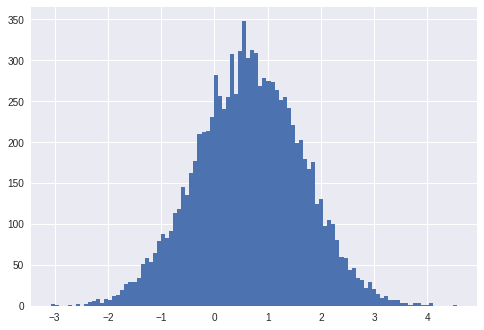

In [3]:
ob = OneBandit()
data = []
for i in range(10000):
    data.append(ob.pull_the_lever())
    
plt.hist(data, bins=100)
plt.show()

### Create K such Bandits

In [4]:
class KBandits:
    
    def __init__(self, k=10):
        self._bandits = []
        self._k = k
        
        for i in range(k):
            self._bandits.append(OneBandit())
    
    def show_actual_rewards(self):
        for i in range(self._k):
            print("Bandit: {} Actual Reward: {}".format(i, self._bandits[i]._actual_reward))
            
    def pull_the_lever(self, bandit_index_0based):
        return self._bandits[bandit_index_0based].pull_the_lever()
    

### Let's check a sample distribution of executing this Bandit

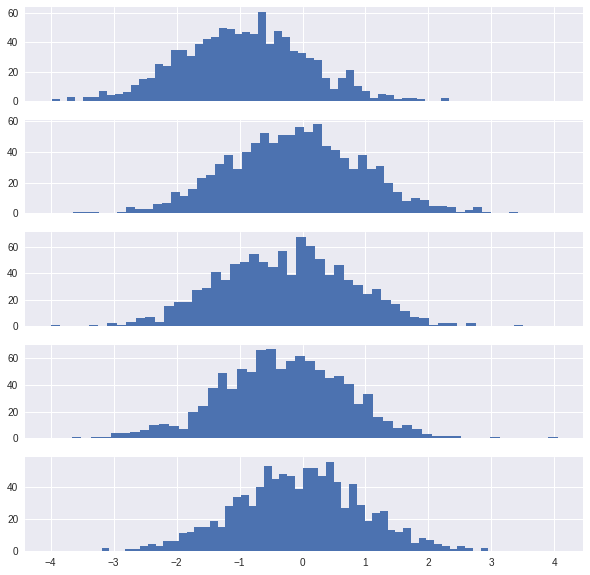

In [5]:
kb = KBandits(k=5)

kdata = []

for k in range(kb._k):
    data = []
    for i in range(1000):
        data.append(kb.pull_the_lever(k-1))
    kdata.append(data)

f, axes = plt.subplots(kb._k, sharex=True)

for k in range(kb._k):
    axes[k].hist(kdata[k], bins=50)
    
#f.subplots_adjust(hspace=0)
f.set_size_inches(10, 10)
plt.show()

In [6]:
num_bandits = 10 # num actions
epsilon = 0.1
kb = KBandits(k=num_bandits)
kb.show_actual_rewards()

Bandit: 0 Actual Reward: -0.6959842774579671
Bandit: 1 Actual Reward: 0.31002563293508917
Bandit: 2 Actual Reward: 0.921686703032693
Bandit: 3 Actual Reward: 0.6424718393565905
Bandit: 4 Actual Reward: 0.3926889718091677
Bandit: 5 Actual Reward: 1.6269889138263616
Bandit: 6 Actual Reward: -0.6660920454253372
Bandit: 7 Actual Reward: -0.3842570186112482
Bandit: 8 Actual Reward: -0.20333481993478938
Bandit: 9 Actual Reward: 0.9433630743642001


In [27]:
action_values = [0.0 for _ in range(num_bandits)]
action_count  = [0 for _ in range(num_bandits)]
    
reward_average = 0
stepSize = 0.1
step = 0
num_iterations = 1000

for i in range(num_iterations):
    
    action = -1
    if np.random.binomial(1, 0.1) == 1:
        action = np.random.randint(0, num_bandits)
    else:
        action = np.argmax(action_values)
    
    reward = kb.pull_the_lever(action)
    
    step += 1
    reward_average = (step - 1.0) / step * reward_average + reward / step
    
    action_count[action] += 1
    action_values[action] = action_values[action] + stepSize * (reward - action_values[action])
    
    
print(reward_average)
for i in range(num_bandits):
    print("Bandit: {0} Estimated Reward: {1}".format(i, action_values[i]))
    

1.4200624601659777
Bandit: 0 Estimated Reward: -0.5218617382201127
Bandit: 1 Estimated Reward: 0.431300253637319
Bandit: 2 Estimated Reward: 0.5466959655665972
Bandit: 3 Estimated Reward: 0.6303486057006755
Bandit: 4 Estimated Reward: 0.15837191488276856
Bandit: 5 Estimated Reward: 1.5321467152177186
Bandit: 6 Estimated Reward: -0.4157279491695077
Bandit: 7 Estimated Reward: -0.17637227592812202
Bandit: 8 Estimated Reward: 0.18558431648023194
Bandit: 9 Estimated Reward: 0.4690842439182874
